In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv


In [125]:
data = pd.read_csv("/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv")

**Get a basic understanding of the dataset structure and example records.**

In [126]:
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [127]:
data.tail()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3
9999,SESSION10000,Undergraduate,Math,2025-04-16,10.85,3,Writing,4,Assignment Completed,True,4.9


In [128]:
data.sample(4)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
1886,SESSION01887,Undergraduate,Biology,2025-01-21,23.41,6,Coding,2,Idea Drafted,True,1.0
5395,SESSION05396,Graduate,Math,2024-08-01,22.25,5,Coding,4,Idea Drafted,True,5.0
5093,SESSION05094,Undergraduate,Biology,2024-12-12,30.91,10,Writing,3,Assignment Completed,True,3.0
4884,SESSION04885,Undergraduate,Business,2024-07-24,13.04,4,Writing,3,Assignment Completed,True,2.3


**Understand dataset size**

In [129]:
data.shape

(10000, 11)

**Get a list of features for later reference.**

In [130]:
data.columns

Index(['SessionID', 'StudentLevel', 'Discipline', 'SessionDate',
       'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'SatisfactionRating'],
      dtype='object')

**Evaluate data quality and structure.**

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


**Spot outliers or trends in the data.**

In [132]:
data.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


**Check if data cleaning is needed.**

In [133]:
data.isnull().sum

<bound method DataFrame.sum of       SessionID  StudentLevel  Discipline  SessionDate  SessionLengthMin  \
0         False         False       False        False             False   
1         False         False       False        False             False   
2         False         False       False        False             False   
3         False         False       False        False             False   
4         False         False       False        False             False   
...         ...           ...         ...          ...               ...   
9995      False         False       False        False             False   
9996      False         False       False        False             False   
9997      False         False       False        False             False   
9998      False         False       False        False             False   
9999      False         False       False        False             False   

      TotalPrompts  TaskType  AI_AssistanceLevel  FinalO

**Prepare for data visualization using Matplotlib and Seaborn.**

In [134]:
import seaborn as sns

In [135]:
import matplotlib.pyplot as plt

**Understand which student groups use AI longer and for what type of task.**

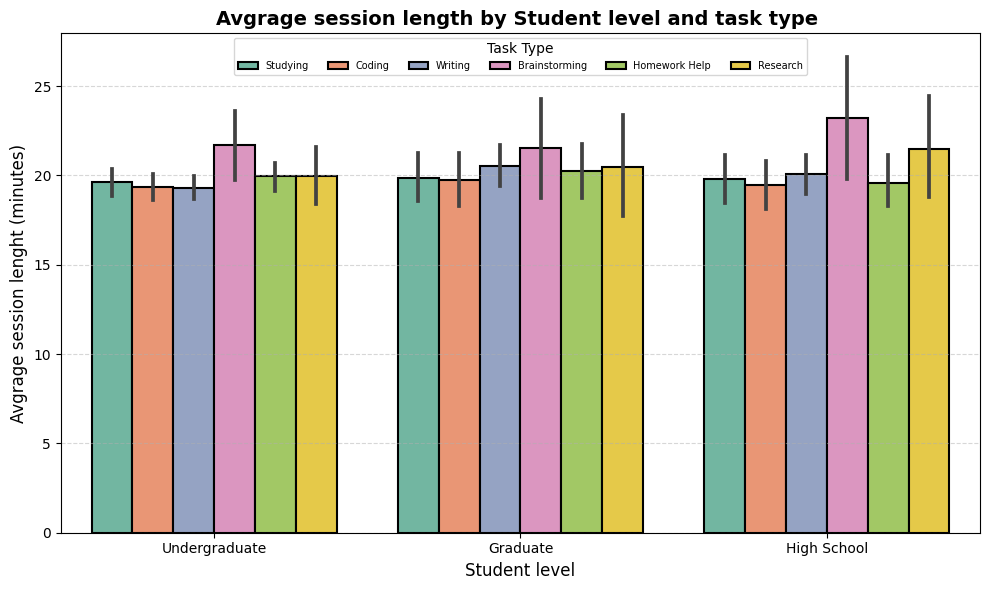

In [136]:
plt.figure(figsize=(10,6)) #set figsize

sns.barplot(
    x = 'StudentLevel',
    y = 'SessionLengthMin',
    hue = 'TaskType',
    data = data,
    palette = 'Set2', #soft color palette
    edgecolor = 'black', #outline bar
    linewidth = 1.5
)

# custom lable and tittle 
plt.title('Avgrage session length by Student level and task type ',fontsize =14,weight ='bold')
plt.xlabel('Student level',fontsize = 12)
plt.ylabel('Avgrage session lenght (minutes)',fontsize = 12)

# add grid for readability
plt.grid (axis = 'y' , linestyle ='--',alpha = 0.5)

#move legend
plt.legend (title = 'Task Type', loc = 'upper center',bbox_to_anchor=(0.5, 1.0), ncol=6,prop={'size': 7})

#tight layout show
plt.tight_layout()
plt.show()

**Numerical support for the previous visualization.**

In [137]:
print("Average Session Length by Student Level:")
print(data.groupby('StudentLevel')['SessionLengthMin'].mean(), "\n")

Average Session Length by Student Level:
StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64 



**Focus on students who completed their assignments using AI.**

In [138]:
data['FinalOutcome'].unique() # unique value finaloutcome column

array(['Assignment Completed', 'Idea Drafted', 'Confused', 'Gave Up'],
      dtype=object)

In [139]:
mask = data['FinalOutcome'] == 'Assignment Completed'
data[mask] # filtered dataframe where finalOutcome is Assignment Completed

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9
...,...,...,...,...,...,...,...,...,...,...,...
9993,SESSION09994,Undergraduate,Biology,2025-03-09,18.18,4,Studying,4,Assignment Completed,True,3.3
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3


In [140]:
data[mask].shape

(4768, 11)

In [141]:
def get_final_outcome_count(FinalOutcome):
    mask = data['FinalOutcome']== FinalOutcome
    return data[mask].shape[0]

In [142]:
get_final_outcome_count("Assignment Completed")

4768

In [143]:
data['FinalOutcome'].value_counts()

FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64

**Understand the effectiveness of AI-assisted sessions.**

In [144]:
data['FinalOutcome'].value_counts(normalize = True)*100

FinalOutcome
Assignment Completed    47.68
Idea Drafted            28.66
Confused                16.13
Gave Up                  7.53
Name: proportion, dtype: float64

**Prepare formatted data for stacked bar chart by student level.**

In [145]:
data.groupby('StudentLevel')['FinalOutcome'].value_counts()

StudentLevel   FinalOutcome        
Graduate       Assignment Completed     936
               Idea Drafted             567
               Confused                 331
               Gave Up                  161
High School    Assignment Completed     948
               Idea Drafted             597
               Confused                 335
               Gave Up                  147
Undergraduate  Assignment Completed    2884
               Idea Drafted            1702
               Confused                 947
               Gave Up                  445
Name: count, dtype: int64

In [146]:
# Group and calculate % (normalize=True)
pct = data.groupby('StudentLevel')['FinalOutcome'].value_counts(normalize = True)*100

In [147]:
pct

StudentLevel   FinalOutcome        
Graduate       Assignment Completed    46.917293
               Idea Drafted            28.421053
               Confused                16.591479
               Gave Up                  8.070175
High School    Assignment Completed    46.768624
               Idea Drafted            29.452393
               Confused                16.526887
               Gave Up                  7.252097
Undergraduate  Assignment Completed    48.243560
               Idea Drafted            28.471061
               Confused                15.841419
               Gave Up                  7.443961
Name: proportion, dtype: float64

In [148]:
outcome_pct = pct.round(0).astype(int)
outcome_pct

StudentLevel   FinalOutcome        
Graduate       Assignment Completed    47
               Idea Drafted            28
               Confused                17
               Gave Up                  8
High School    Assignment Completed    47
               Idea Drafted            29
               Confused                17
               Gave Up                  7
Undergraduate  Assignment Completed    48
               Idea Drafted            28
               Confused                16
               Gave Up                  7
Name: proportion, dtype: int64

In [149]:
outcome_pct = outcome_pct.reset_index(name='Percentage')


**Make it easy to compare success rates across student levels.**

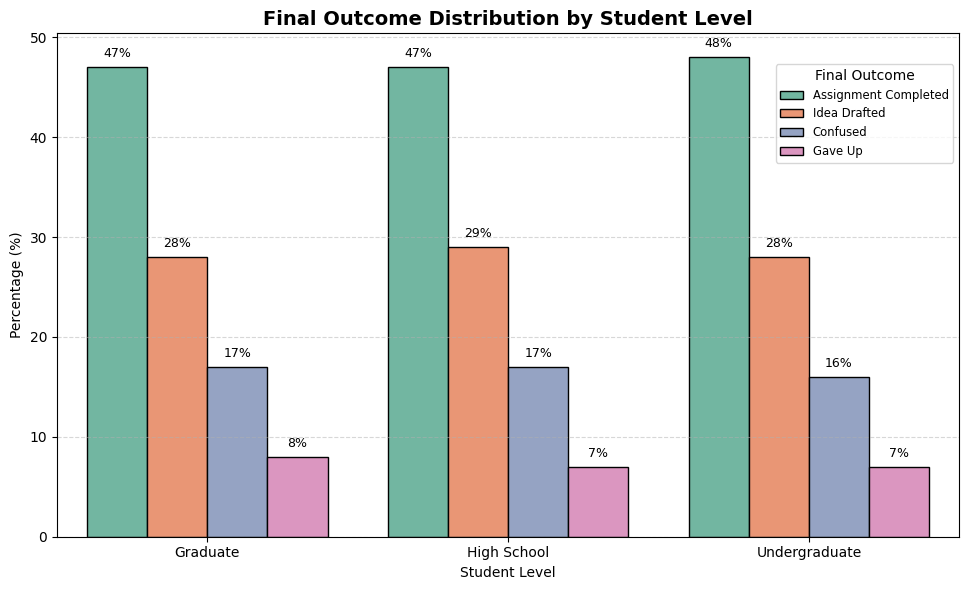

In [150]:
plt.figure(figsize=(10,6))
sns.barplot(
    x = 'StudentLevel',
    y = 'Percentage',
    hue = 'FinalOutcome',
    data = outcome_pct,
    palette = 'Set2',
    edgecolor = 'black'
)

# Add annotations
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(
            p.get_x() + p.get_width() / 2,
            height + 1,
            f'{round(height)}%',  # Rounded percent
            ha='center',
            fontsize=9
        )

plt.title('Final Outcome Distribution by Student Level', fontsize=14, weight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Student Level')
plt.legend(title='Final Outcome', loc='upper left', bbox_to_anchor=(0.79, 0.95), ncol=1, fontsize='small')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Understand user experience quality.**

In [151]:
print("Average Satisfaction by Final Outcome:")
print(data.groupby('FinalOutcome')['SatisfactionRating'].mean(), "\n")

Average Satisfaction by Final Outcome:
FinalOutcome
Assignment Completed    3.430474
Confused                3.446311
Gave Up                 3.357105
Idea Drafted            3.396546
Name: SatisfactionRating, dtype: float64 



**Reveal task-specific AI involvement.**

In [152]:
print("Average AI Assistance Level by Task Type:")
print(data.groupby('TaskType')['AI_AssistanceLevel'].mean(), "\n")

Average AI Assistance Level by Task Type:
TaskType
Brainstorming    3.424370
Coding           3.516427
Homework Help    3.503828
Research         3.415966
Studying         3.460784
Writing          3.471461
Name: AI_AssistanceLevel, dtype: float64 



**See which tasks are most common among students.**

In [153]:
print("Session count per Task Type:")
print(data['TaskType'].value_counts(), "\n")

Session count per Task Type:
TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64 



In this section, we calculate the correlation matrix between three key numerical variables:
* SessionLengthMin – the total time spent using the AI assistant.
* AI_AssistanceLevel – the level of support provided by the AI.
* SatisfactionRating – the user’s reported satisfaction.


In [154]:
# Correlation matrix
print("Correlation Matrix:\n", data[['SessionLengthMin', 'AI_AssistanceLevel', 'SatisfactionRating']].corr(), "\n")

Correlation Matrix:
                     SessionLengthMin  AI_AssistanceLevel  SatisfactionRating
SessionLengthMin            1.000000           -0.006848           -0.011136
AI_AssistanceLevel         -0.006848            1.000000            0.775513
SatisfactionRating         -0.011136            0.775513            1.000000 



This helps us understand the linear relationships between these features. Some key observations:
A positive correlation between AI_AssistanceLevel and SatisfactionRating may suggest that higher AI involvement leads to higher user satisfaction.
A weak or moderate correlation between SessionLengthMin and SatisfactionRating implies that longer sessions do not always guarantee satisfaction.
The matrix provides insight into which variables move together, and can help guide feature selection or further analysis.

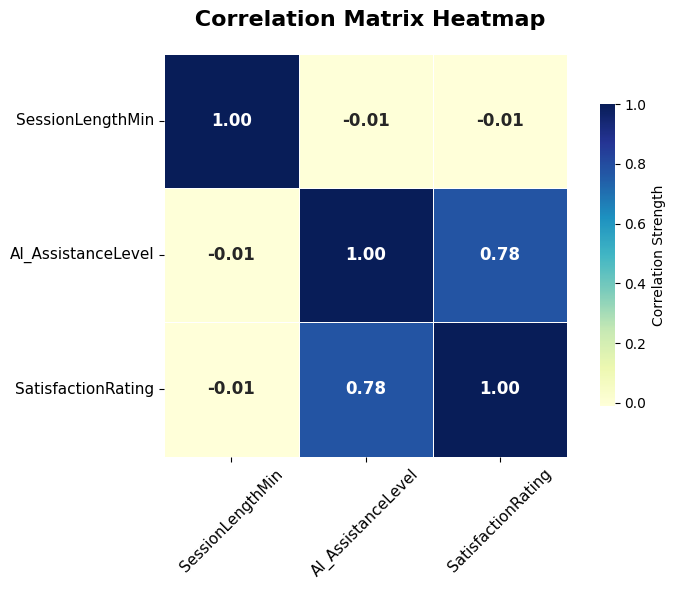

In [155]:
#Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,                    # Show correlation values
    fmt=".2f",                     # Format to 2 decimal places
    cmap='YlGnBu',                 # Visually pleasing color palette
    linewidths=0.5,                # Line between boxes
    linecolor='white',            # Line color
    square=True,                  # Make cells square
    cbar_kws={"shrink": .75, "label": "Correlation Strength"},  # Colorbar tweaks
    annot_kws={"size": 12, "weight": "bold"}                    # Annotation font
)

# Title and layout
plt.title(" Correlation Matrix Heatmap", fontsize=16, weight='bold', pad=20)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
plt.show()

To enhance the interpretability of the correlation matrix, we use a heatmap to visually represent the strength of relationships among:
*  SessionLengthMin
*  AI_AssistanceLevel
*  SatisfactionRating

* The color intensity shows the magnitude of correlation: dark = stronger.
* Annotated values make it easy to identify specific relationships.
* This visual tool helps quickly spot trends, such as:
    * Whether higher AI assistance tends to improve satisfaction
    * If session length correlates meaningfully with outcomes
This heatmap gives us a clear, at-a-glance understanding of which features are most related — valuable for both analysis and potential predictive modeling.

<Axes: xlabel='TaskType', ylabel='SatisfactionRating'>

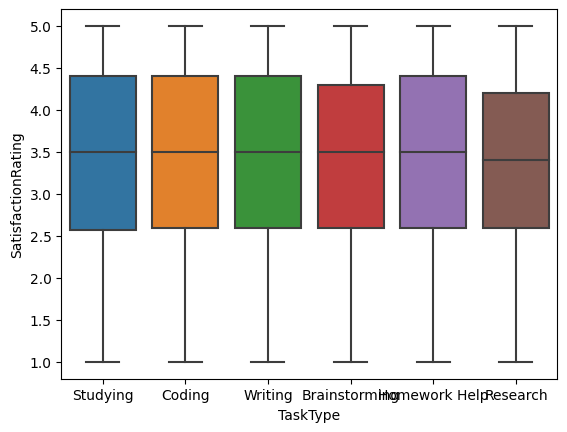

In [156]:
sns.boxplot(x='TaskType', y='SatisfactionRating', data=data)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

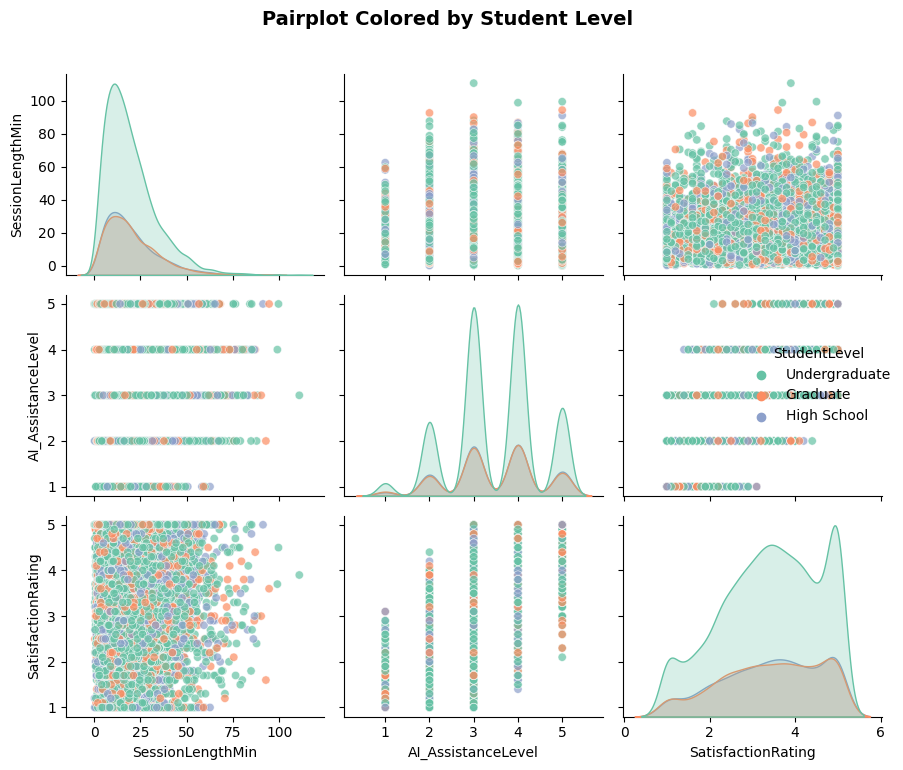

In [157]:
sns.pairplot(
    data[['SessionLengthMin', 'AI_AssistanceLevel', 'SatisfactionRating', 'StudentLevel']],
    hue='StudentLevel',
    palette='Set2',
    diag_kind='kde',        # Smoother curves on diagonals
    plot_kws={'alpha': 0.7} # Slight transparency
)

plt.suptitle("Pairplot Colored by Student Level", y=1.02, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()



In [158]:
data.groupby(['StudentLevel', 'TaskType'])['SatisfactionRating'].agg(['mean', 'count']).round(2)


mean  count
StudentLevel  TaskType                  
Graduate      Brainstorming  3.38     99
              Coding         3.52    399
              Homework Help  3.45    399
              Research       3.31    114
              Studying       3.34    382
              Writing        3.42    602
High School   Brainstorming  3.30     90
              Coding         3.37    373
              Homework Help  3.42    395
              Research       3.60     97
              Studying       3.42    442
              Writing        3.46    630
Undergraduate Brainstorming  3.43    287
              Coding         3.46   1176
              Homework Help  3.43   1165
              Research       3.26    265
              Studying       3.42   1216
              Writing        3.39   1869

In this section, we group the data by both StudentLevel and TaskType to analyze how satisfaction varies across different user segments.